<a href="https://colab.research.google.com/github/SaeedARV/Image-Similarity/blob/main/Roshan_ImageSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕Install dependencies

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import tensorflow as tf

import os
import PIL
import PIL.Image
import random
import os
import cv2

from tqdm import tqdm

# ⭕Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# ⭕Download datasets and convert files to proper format

## Download the data needed for evaluation

In [ ]:
!mkdir /content/drive/MyDrive/dataset

In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz

--2023-07-27 08:11:59--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz [following]
--2023-07-27 08:11:59--  https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  20.3MB/s    in 45s     

2023-07-27 08:12:45 (7.33 MB/s) - ‘/content/drive/MyDrive/dataset/102flowers.tgz’ saved [344862509/344862509]



In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102segmentations.tgz

--2023-07-27 08:12:45--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102segmentations.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/102segmentations.tgz [following]
--2023-07-27 08:12:46--  https://thor.robots.ox.ac.uk/datasets/flowers-102/102segmentations.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203577493 (194M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/102segmentations.tgz’

102segmentations.tg 100%[===================>] 194.15M  19.3MB/s    in 12s     

2023-07-27 08:12:59 (15.9 MB/s) - ‘/content/drive/MyDrive/dataset/102segmentations.tgz’ saved

In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/distancematrices102.mat

--2023-07-27 08:12:59--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/distancematrices102.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/distancematrices102.mat [following]
--2023-07-27 08:13:00--  https://thor.robots.ox.ac.uk/datasets/flowers-102/distancematrices102.mat
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978812286 (1.8G) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/distancematrices102.mat’

distancematrices102 100%[===================>]   1.84G  19.4MB/s    in 98s     

2023-07-27 08:14:39 (19.2 MB/s) - ‘/content/drive/MyDrive/dataset/distancematric

In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2023-07-27 08:14:39--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/imagelabels.mat [following]
--2023-07-27 08:14:40--  https://thor.robots.ox.ac.uk/datasets/flowers-102/imagelabels.mat
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502 [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/imagelabels.mat’

imagelabels.mat     100%[===================>]     502  --.-KB/s    in 0s      

2023-07-27 08:14:40 (47.8 MB/s) - ‘/content/drive/MyDrive/dataset/imagelabels.mat’ saved [502/502]



In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/setid.mat

--2023-07-27 08:14:40--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/setid.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/setid.mat [following]
--2023-07-27 08:14:41--  https://thor.robots.ox.ac.uk/datasets/flowers-102/setid.mat
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14989 (15K) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/setid.mat’

setid.mat           100%[===================>]  14.64K  --.-KB/s    in 0.001s  

2023-07-27 08:14:42 (15.2 MB/s) - ‘/content/drive/MyDrive/dataset/setid.mat’ saved [14989/14989]



## Convert .mat files to .csv

In [ ]:
import scipy.io
import pandas as pd

In [ ]:
mat = scipy.io.loadmat('/content/drive/MyDrive/dataset/imagelabels.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})
data.to_csv("/content/drive/MyDrive/dataset/imagelabels.csv")

In [ ]:
mat = scipy.io.loadmat('/content/drive/MyDrive/dataset/setid.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})
data.to_csv("/content/drive/MyDrive/dataset/setid.csv")

In [ ]:
mat = scipy.io.loadmat('/content/drive/MyDrive/dataset/distancematrices102.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})
data.to_csv("/content/drive/MyDrive/dataset/distancematrices102.csv")

## Extract .tgz files

In [ ]:
import tarfile

In [ ]:
file = tarfile.open('/content/drive/MyDrive/dataset/102flowers.tgz')
file.extractall('/content/drive/MyDrive/dataset/102flowers')
file.close()

In [ ]:
file = tarfile.open('/content/drive/MyDrive/dataset/102segmentations.tgz')
file.extractall('/content/drive/MyDrive/dataset/102segmentations')
file.close()

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/dataset/imagelabels.csv', index_col=0)['labels']
labels

0       77
1       77
2       77
3       77
4       77
        ..
8184    62
8185    62
8186    62
8187    62
8188    62
Name: labels, Length: 8189, dtype: int64

# ⭕Visualize the data

## Load labels

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/dataset/imagelabels.csv', index_col=0)['labels']
labels

NameError: ignored

## Display several numbers of images and their labels

In [ ]:
sampled_img = random.sample(os.listdir('/content/drive/MyDrive/dataset/102flowers/jpg'), k=5)

for img_name in sampled_img:
  img_number = img_name.split('.')[0].split('_')[1]
  lbl = labels[int(img_number)]
  print("Label of following image:", lbl)
  print()

  img_path = os.path.join('/content/drive/MyDrive/dataset/102flowers/jpg', img_name)
  img = mpimg.imread(img_path)
  fig, ax = plt.subplots(figsize=(3, 3))
  ax.imshow(img)
  ax.axis('off')
  plt.show()

  print()
  print("="*80)


NameError: ignored

# ⭕Prepare a dataset with four features from the distancematrices102 file

## Make an unpreprocessed dataset

In [ ]:
# To see how much time is required
from tqdm import tqdm

In [ ]:
base_data = pd.read_csv('/content/drive/MyDrive/dataset/distancematrices102.csv', index_col=0)
base_data

,Dsiftint,Dhsv,Dsiftbdy,Dhog
0,0.000000,0.000000,0.000000,0.000000
1,1.647161,1.846136,1.534720,1.586323
2,1.856015,1.218864,1.811782,0.596286
3,1.718655,1.146336,1.589349,0.563323
4,1.617642,1.050346,1.426147,0.506695
...,...,...,...,...
8184,1.791882,1.388551,1.686492,0.753930
8185,1.727825,1.801372,1.769005,1.163411
8186,1.755449,1.603888,1.678640,0.795541
8187,1.849127,1.709906,1.645970,0.912156


In [ ]:
base_data['label'] = pd.read_csv('/content/drive/MyDrive/dataset/imagelabels.csv', index_col=0)
base_data

,Dsiftint,Dhsv,Dsiftbdy,Dhog,label
0,0.000000,0.000000,0.000000,0.000000,77
1,1.647161,1.846136,1.534720,1.586323,77
2,1.856015,1.218864,1.811782,0.596286,77
3,1.718655,1.146336,1.589349,0.563323,77
4,1.617642,1.050346,1.426147,0.506695,77
...,...,...,...,...,...
8184,1.791882,1.388551,1.686492,0.753930,62
8185,1.727825,1.801372,1.769005,1.163411,62
8186,1.755449,1.603888,1.678640,0.795541,62
8187,1.849127,1.709906,1.645970,0.912156,62


In [ ]:
data = {}
for column in base_data.columns:
  data[column+'_1'] = []
for column in base_data.columns:
  data[column+'_2'] = []
data

{'Dsiftint_1': [],
 'Dhsv_1': [],
 'Dsiftbdy_1': [],
 'Dhog_1': [],
 'label_1': [],
 'Dsiftint_2': [],
 'Dhsv_2': [],
 'Dsiftbdy_2': [],
 'Dhog_2': [],
 'label_2': []}

In [ ]:
t = 0
flag = False
# Iterate over all pairs of rows in the original dataframe and make a dictionary out of it, beacouse it's faster
for i in tqdm(range(1000)):
    for j in range(i+1, 1000):

        for column in list(data.keys()):
          if t == len(data)/2 and not flag:
            t = 0
            flag = True
          elif t == len(data)/2 and flag:
            t = 0
            flag = False
          if flag:
            data[column].append(base_data.iloc[j][t])
          else:
            data[column].append(base_data.iloc[i][t])
          t += 1

100%|██████████| 1000/1000 [06:59<00:00,  2.38it/s]


In [ ]:
# Convert dictionary to dataframe
data = pd.DataFrame(data)
data

,Dsiftint_1,Dhsv_1,Dsiftbdy_1,Dhog_1,label_1,Dsiftint_2,Dhsv_2,Dsiftbdy_2,Dhog_2,label_2
0,0.000000,0.000000,0.000000,0.000000,77.0,1.647161,1.846136,1.534720,1.586323,77.0
1,0.000000,0.000000,0.000000,0.000000,77.0,1.856015,1.218864,1.811782,0.596286,77.0
2,0.000000,0.000000,0.000000,0.000000,77.0,1.718655,1.146336,1.589349,0.563323,77.0
3,0.000000,0.000000,0.000000,0.000000,77.0,1.617642,1.050346,1.426147,0.506695,77.0
4,0.000000,0.000000,0.000000,0.000000,77.0,1.647941,1.260486,1.452537,0.545488,77.0
...,...,...,...,...,...,...,...,...,...,...
499495,1.757396,1.927067,1.697114,0.769053,46.0,1.777056,1.870762,1.668333,0.771897,46.0
499496,1.757396,1.927067,1.697114,0.769053,46.0,1.764498,1.883363,1.722858,0.905673,46.0
499497,1.748860,1.906368,1.730757,0.877809,46.0,1.777056,1.870762,1.668333,0.771897,46.0
499498,1.748860,1.906368,1.730757,0.877809,46.0,1.764498,1.883363,1.722858,0.905673,46.0


In [ ]:
for index, row in tqdm(data.iterrows()):
  data.at[index, 'label'] = (row['label_1'] == row['label_2'])

data

499500it [00:46, 10689.88it/s]


,Dsiftint_1,Dhsv_1,Dsiftbdy_1,Dhog_1,label_1,Dsiftint_2,Dhsv_2,Dsiftbdy_2,Dhog_2,label_2,label
0,0.000000,0.000000,0.000000,0.000000,77.0,1.647161,1.846136,1.534720,1.586323,77.0,True
1,0.000000,0.000000,0.000000,0.000000,77.0,1.856015,1.218864,1.811782,0.596286,77.0,True
2,0.000000,0.000000,0.000000,0.000000,77.0,1.718655,1.146336,1.589349,0.563323,77.0,True
3,0.000000,0.000000,0.000000,0.000000,77.0,1.617642,1.050346,1.426147,0.506695,77.0,True
4,0.000000,0.000000,0.000000,0.000000,77.0,1.647941,1.260486,1.452537,0.545488,77.0,True
...,...,...,...,...,...,...,...,...,...,...,...
499495,1.757396,1.927067,1.697114,0.769053,46.0,1.777056,1.870762,1.668333,0.771897,46.0,True
499496,1.757396,1.927067,1.697114,0.769053,46.0,1.764498,1.883363,1.722858,0.905673,46.0,True
499497,1.748860,1.906368,1.730757,0.877809,46.0,1.777056,1.870762,1.668333,0.771897,46.0,True
499498,1.748860,1.906368,1.730757,0.877809,46.0,1.764498,1.883363,1.722858,0.905673,46.0,True


In [ ]:
data = data.drop(['label_1', 'label_2'], axis=1)
data

,Dsiftint_1,Dhsv_1,Dsiftbdy_1,Dhog_1,Dsiftint_2,Dhsv_2,Dsiftbdy_2,Dhog_2,label
0,0.000000,0.000000,0.000000,0.000000,1.647161,1.846136,1.534720,1.586323,True
1,0.000000,0.000000,0.000000,0.000000,1.856015,1.218864,1.811782,0.596286,True
2,0.000000,0.000000,0.000000,0.000000,1.718655,1.146336,1.589349,0.563323,True
3,0.000000,0.000000,0.000000,0.000000,1.617642,1.050346,1.426147,0.506695,True
4,0.000000,0.000000,0.000000,0.000000,1.647941,1.260486,1.452537,0.545488,True
...,...,...,...,...,...,...,...,...,...
499495,1.757396,1.927067,1.697114,0.769053,1.777056,1.870762,1.668333,0.771897,True
499496,1.757396,1.927067,1.697114,0.769053,1.764498,1.883363,1.722858,0.905673,True
499497,1.748860,1.906368,1.730757,0.877809,1.777056,1.870762,1.668333,0.771897,True
499498,1.748860,1.906368,1.730757,0.877809,1.764498,1.883363,1.722858,0.905673,True


In [ ]:
data['label'].value_counts()

False    406149
True      93351
Name: label, dtype: int64

## Save the unpreprocessed dataset to csv to be able to use it later

In [ ]:
data.to_csv('/content/drive/MyDrive/dataset/unpreprocessed_data.csv', index=False)

KeyboardInterrupt: ignored

# ⭕Train and Evaluate Models on the simple dataset

## Install dependencies

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## load the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/unpreprocessed_data.csv', index_col=0)

In [ ]:
data['label'].value_counts()

False    107519
True      25704
Name: label, dtype: int64

## Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['label'], axis=1).reset_index(drop=True)
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Train several simple model

### 🔵KNN Classifier

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
acc = knn_classifier.score(X_test, y_test)
acc

0.9772189904297242

### 🔵Decision Tree Classifier

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
acc = dt_classifier.score(X_test, y_test)
acc

0.999962469506474

### 🔵Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
acc = rf_classifier.score(X_test, y_test)
acc

### 🔵Naive Bayes Classifier

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
acc = nb_classifier.score(X_test, y_test)
acc

0.8844811409270031

# ⭕Prepare a normal dataset

## Make an unbalanced train_data and test_data

In [3]:
# TODO: use data augmentation to balance the dataset

In [6]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import random

from tqdm import tqdm

In [5]:
# Set the path to the image folder
image_folder = '/content/drive/MyDrive/dataset/102flowers/jpg'

# Set the desired image size
image_size = (256, 256)

# Create an empty list to store the images
images = []

# Iterate over the files in the image folder
for filename in tqdm(os.listdir(image_folder)):
    if filename.endswith('.jpg'):
        # Open the image and convert to a numpy array
        with Image.open(os.path.join(image_folder, filename)) as img:
            img_resized = img.resize(image_size)
            img_array = np.array(img_resized)

        # Append the image array to the images list
        images.append(img_array)

KeyboardInterrupt: ignored

In [ ]:
data = pd.DataFrame({'images': images})

In [ ]:
data['labels'] = pd.read_csv('/content/drive/MyDrive/dataset/imagelabels.csv', index_col=0)
data

In [ ]:
unique_labels = data['labels'].unique()
random_unique_labels = random.sample(list(unique_labels), k=20)

In [ ]:
random_unique_labels

In [ ]:
data['labels']

In [ ]:
# Split the DataFrame based on the random unique labels
df_list = [data.query('labels == @label').reset_index(drop=True) for label in random_unique_labels]

# Concatenate the DataFrames along the rows to create a new DataFrame
test_data = pd.concat(df_list)

In [ ]:
# Create another DataFrame for the remaining rows
train_data = data.query('labels not in @random_unique_labels').reset_index(drop=True)

In [ ]:
test_data.shape

In [ ]:
train_data.shape

In [ ]:
train_data['labels'].value_counts() # It's unbalanced

## Save train_data and test_data to csv to be able to use them later

In [ ]:
train_data.to_csv('/content/drive/MyDrive/dataset/train_data.csv', index=False)

NameError: ignored

In [ ]:
test_data.to_csv('/content/drive/MyDrive/dataset/test_data.csv', index=False, )

## Train

In [46]:
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

In [44]:
labels = pd.read_csv('/content/drive/MyDrive/dataset/imagelabels.csv', index_col=0)['labels']

In [47]:
unique_labels = labels.unique()
random_unique_labels = random.sample(list(unique_labels), k=20)

In [39]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/102flowers",
    validation_split=0.2,
    labels=labels.to_numpy().tolist(),
    label_mode='int',
    subset="both",
    seed=1337,
    image_size=(256, 256),
    batch_size=32,
)

Found 8189 files belonging to 102 classes.
Using 6552 files for training.
Using 1637 files for validation.


In [42]:
train_ds.take(1)[0]

TypeError: ignored

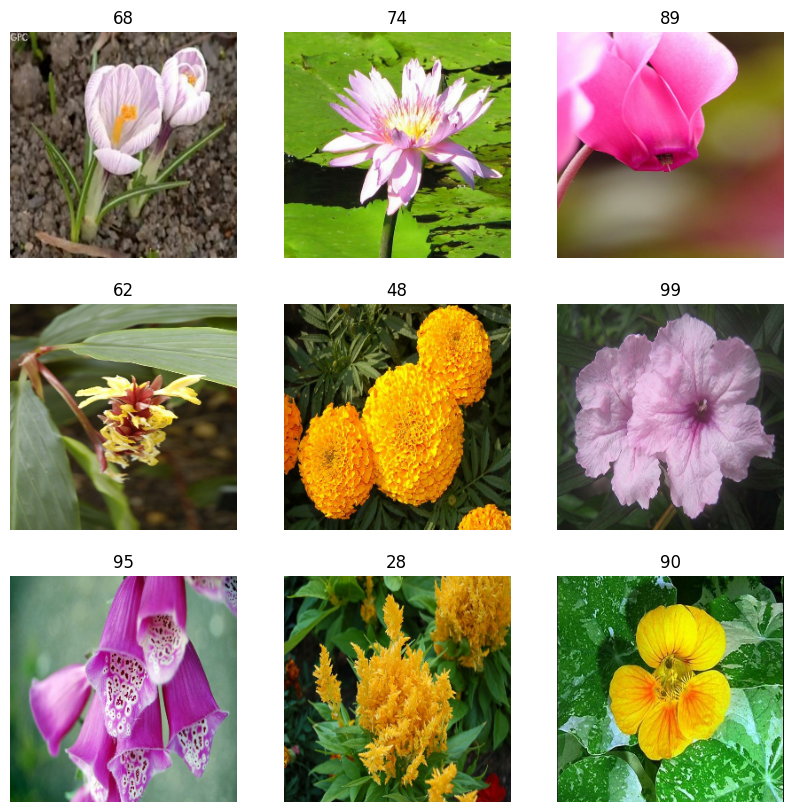

In [41]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")


In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, utils, layers, models, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt

In [16]:
num_classes = 102
feature_dims = 2

In [17]:
(X_train, y_train) = np.array(train_data['images']), np.array(train_data['labels'])

In [19]:
X_train

array([array([[[112, 118, 111],
               [120, 125, 124],
               [127, 128, 135],
               ...,
               [ 14,  17,  21],
               [ 15,  18,  15],
               [ 20,  22,  16]],

              [[103, 109, 103],
               [111, 116, 115],
               [120, 121, 127],
               ...,
               [ 14,  17,  22],
               [ 15,  18,  16],
               [ 19,  21,  15]],

              [[ 95, 101,  97],
               [103, 107, 108],
               [113, 115, 120],
               ...,
               [ 14,  18,  22],
               [ 12,  16,  14],
               [ 16,  19,  14]],

              ...,

              [[  9,   9,   7],
               [  9,   9,   7],
               [  9,   9,   7],
               ...,
               [ 19,  21,  19],
               [ 16,  19,  16],
               [ 15,  18,  16]],

              [[  9,   9,   7],
               [  9,   9,   7],
               [  9,   9,   7],
               ...,
        

In [ ]:
(X_test, y_test) = np.array(test_data['images']), np.array(test_data['labels'])

In [ ]:
X_train.shape

(256, 256, 3)

In [ ]:
def build_model():
    input = layers.Input(shape = X_train.shape[1:])
    x = layers.Flatten()(input)
    x = layers.Dense(units = 128, activation = "tanh")(x)
    feature = layers.Dense(units = feature_dims, activation = "linear", name = "feature")(x)
    output = layers.Dense(units = num_classes, activation = "softmax", name = "output")(feature)

    return models.Model(input, [feature, output])

In [ ]:
class CenterLoss(losses.Loss):
    def __init__(self, num_classes, feature_dims, alpha = 0.5):
        super(CenterLoss, self).__init__()

        self.num_classes = num_classes
        self.feature_dims = feature_dims
        # hyper parameter for updating the center point
        self.alpha = alpha

        self.centers = tf.Variable(tf.zeros(shape = (self.num_classes, self.feature_dims)))

    def call(self, y_true, y_pred):
        """
            y_ture : same teacher signal as for classification (1-hot vector)
                     shape = (batch_size, num_classes)
            y_pred : output of features in the middle layer of the model
                     shape = (batch_size, feature_dims)
        """

        labels = tf.argmax(y_true, axis=-1)

        centers_batch = tf.gather(self.centers, labels)

        diff = centers_batch - y_pred

        loss = tf.reduce_mean(tf.square(diff))


        unique_label, unique_idx, unique_count = tf.unique_with_counts(labels)
        appear_times = tf.gather(unique_count, unique_idx)
        appear_times = tf.reshape(appear_times, [-1, 1])

        diff = diff / tf.cast((1 + appear_times), tf.float32)

        diff = self.alpha * diff

        self.centers = tf.compat.v1.scatter_sub(self.centers, labels, diff)

        return loss

In [ ]:
model = build_model()
model.compile(loss = {"feature" : CenterLoss(num_classes, feature_dims), "output" : losses.CategoricalCrossentropy()},
              optimizer = optimizers.Adam(learning_rate = 0.001),
              metrics = {"output" : metrics.CategoricalAccuracy()})

history_2 = model.fit(x = X_train, y = {"feature" : y_train, "output" : y_train}, epochs = 15, batch_size = 256,
                      validation_data = (X_test, {"output" : y_test}))

ValueError: ignored